In [8]:
import sys
sys.path.append('C:\\Users\\Максимилиан\\Desktop\\Skoltech\\Reinforcement learning\\Final project')

In [9]:
from casadi import *
%matplotlib widget
import matplotlib.pyplot as plt
#%matplotlib inline
from Dynamics2 import get_next_state, state_to_coords, get_energy, normalize_angle
from Environment import DoublePendulumEnv #, normalize_angle
from PPO.Proximal_Policy_Optimization import PPO, unscaled_action
from PPO.train import train

In [10]:
from torch import nn
import torch
from torch.utils.tensorboard import SummaryWriter
import gym
from torch.distributions import Normal
from gym.spaces import Box
import random
from IPython.display import clear_output
from torch.distributions import MultivariateNormal
import numpy as np
from matplotlib import animation
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [11]:
state0 = np.array([0,np.pi/2,np.pi/2,
                0,0,0])
state = state0
state

array([0.        , 1.57079633, 1.57079633, 0.        , 0.        ,
       0.        ])

In [12]:
#checkpoint_path = 'PPO_DoubleInvPendulum_0_0.pth'
observation_shape = 6
action_shape = 1
lr_actor = 3e-4  # Learning rate for optimizer of actor network.
lr_critic = 0.001  # Learning rate for optimizer of critic network.
gamma = 0.99
action_std = 0.6  # Initial standard deviation.
action_std_decay_rate = 0.1  # Decay rate of standard deviation.
min_action_std = 0.1  # Threshold standard deviation.
action_std_decay_freq = int(2e5)  # Decay the standard deviation every 2_00_000 timesteps

update_timestep = 5000  # set old_policy parameters to new_policy parameters.
K_epochs = 50  # Number of epochs before updating old policy parameters.
eps_clip = 0.2  # clip range for surrogate loss function.
gamma = gamma  # Discount factor.

agent = PPO(observation_shape,
                action_shape,
                lr_actor,
                lr_critic,
                gamma,
                K_epochs,
                eps_clip,
                action_std)

In [15]:
env_name = 'One_Pole_InvPendulum'
directory = "1_pole_PPO3_Trained" + '/' 
checkpoint_path = directory + "PPO_{}_300K.pth".format(env_name)
print("loading network from : " + checkpoint_path)
agent.load(checkpoint_path)

loading network from : 1_pole_PPO3_Trained/PPO_One_Pole_InvPendulum_300K.pth


C:\ProgramData\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


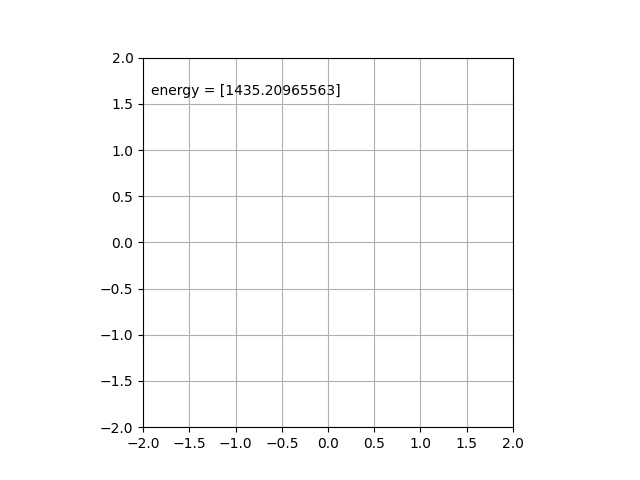

In [17]:
%matplotlib widget

state = state0
dt = 0.02

fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
energy_text = ax.text(0.02, 0.90, '', transform=ax.transAxes)

def init():
    """initialize animation"""
    line.set_data([], [])
    #time_text.set_text('')
    energy_text.set_text('')
    return line


def animate(i):
    """perform animation step"""
    global state, dt
    state_t = torch.FloatTensor(state)
    u = agent.select_action(state_t)
    action = unscaled_action(u, action_low = -100, action_high = 100)
    state = get_next_state(state,u,dt)
    XY = state_to_coords(state)
    en = get_energy(state)
    
    line.set_data(XY[0],XY[1])
    energy_text.set_text(f'energy = {en}')
    return line,

ani = animation.FuncAnimation(fig, animate, frames=300,
                             interval=20, blit=True, init_func=init)

from IPython.display import HTML
HTML(ani.to_jshtml())
